In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from fastai.tabular.core import add_datepart




In [6]:
# Read Data
df=pd.read_csv("NSE_TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2022-04-22,818.0,821.60,803.10,811.60,815.60,1880668,15288.05349
1,2022-04-21,812.0,822.00,804.25,818.95,820.05,1344250,10958.17570
2,2022-04-20,800.0,813.45,792.10,810.10,810.45,1522453,12244.14776
3,2022-04-19,825.0,836.85,784.85,788.00,791.35,2460482,20063.01436
4,2022-04-18,816.2,824.90,809.00,822.50,822.30,1480954,12102.61050


In [7]:
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1561.000000,1561.000000,1561.00000,1561.000000,1561.000000,1.561000e+03,1561.000000
mean,348.303972,353.312460,343.06230,348.047341,348.034177,3.187189e+06,11480.285301
std,222.923844,225.242387,219.99598,222.566091,222.600846,3.349989e+06,14159.640225
min,103.000000,104.600000,100.00000,102.600000,102.650000,1.758370e+05,388.735415
25%,171.800000,173.850000,169.00000,171.000000,171.150000,1.518494e+06,3202.778609
50%,265.950000,271.250000,262.00000,266.200000,266.600000,2.329094e+06,7762.714725
75%,511.000000,517.850000,502.10000,508.600000,509.100000,3.662455e+06,15107.108290
max,885.000000,889.000000,877.60000,880.200000,882.100000,6.355260e+07,234317.687900


In [8]:

# Convert Date to Timeseries
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data['mon_fri'] = 0
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp


train = new_data[:1200]
valid = new_data[1200:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

C:\Users\akeel\AppData\Roaming\Python\Python39\site-packages\fastai\tabular\core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


465.42700065611865


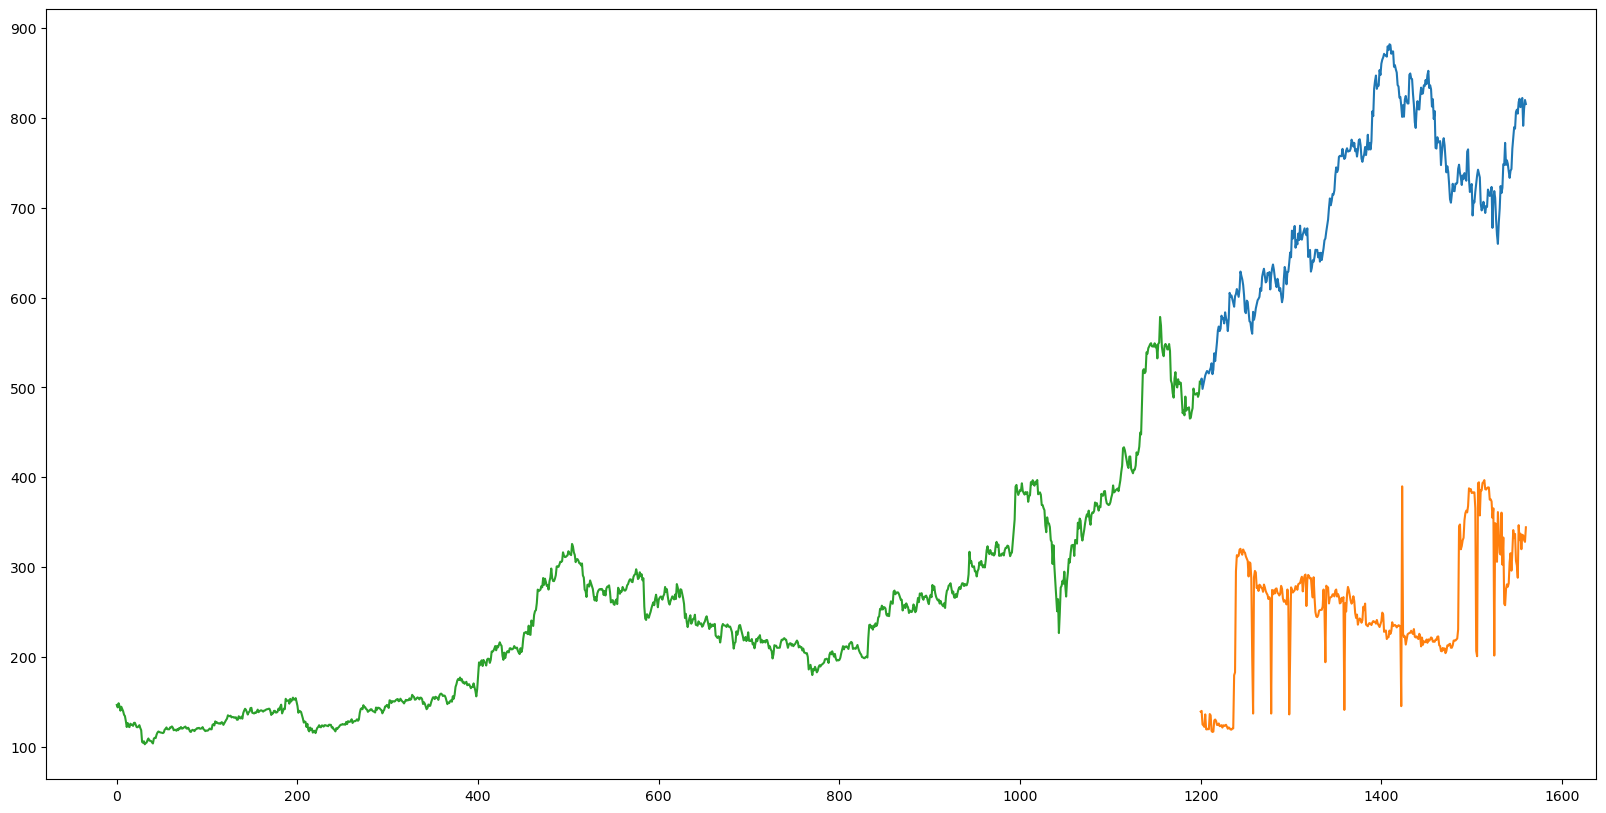

In [11]:

#KNN Model
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
#rms
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)
valid.loc[:, 'Predictions'] = 0
valid.loc[:, 'Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])
